<a href="https://colab.research.google.com/github/wanruu/CS5487/blob/main/pca_svm_rbf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import RepeatedKFold

from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import contingency_matrix

import matplotlib.pyplot as plt
import tqdm

In [3]:
vecs=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_vec.txt')
labels=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_labels.txt')
train_data=vecs[:2000]
test_data=vecs[2000:]
train_label=labels[:2000]
test_label=labels[2000:]

100%|██████████| 100/100 [01:45<00:00,  1.05s/it]


[40, 0.999, 0.954]


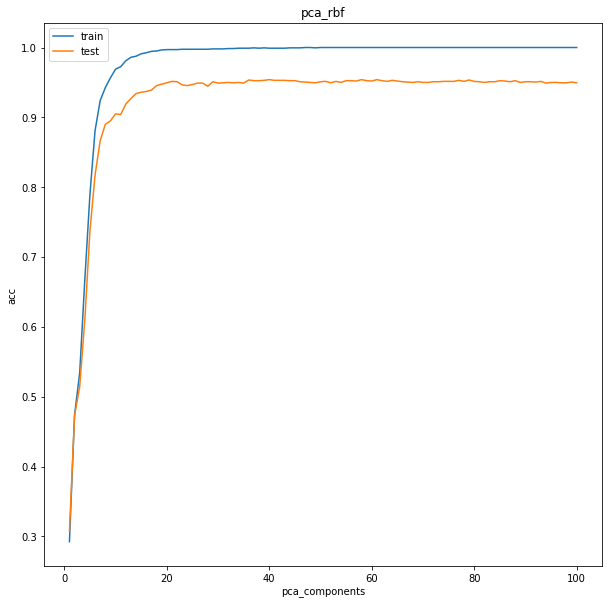

In [6]:
pca_components=[]
pca_train_acc=[]
pca_test_acc=[]
for i in tqdm.tqdm(range(100)):
  pca_component=i+1
  pca = PCA(n_components=pca_component)
  pca_train_data = pca.fit_transform(train_data)
  pca_test_data = pca.transform(test_data)


  train_label=labels[:2000]
  test_label=labels[2000:]
  pca_train_data, pca_train_label = shuffle(pca_train_data, train_label, random_state=123)
  pca_test_data, pca_test_label = shuffle(pca_test_data, test_label, random_state=123)
  classifier = svm.SVC(C=4,kernel='rbf')
  classifier.fit(pca_train_data, pca_train_label)

  pca_components.append(pca_component)
  pca_train_acc.append(classifier.score(pca_train_data, pca_train_label))
  pca_test_acc.append(classifier.score(pca_test_data, pca_test_label))

plt.figure(figsize=(10, 10))
plt.plot(pca_components,pca_train_acc,label='train')
plt.plot(pca_components,pca_test_acc,label='test')
plt.xlabel('pca_components')
plt.ylabel('acc')
plt.title('pca_rbf')
plt.legend()
plt.show

#best c
idx=pca_test_acc.index(max(pca_test_acc))
print([pca_components[idx],pca_train_acc[idx],max(pca_test_acc)])
